In [31]:
import pandas as pd

PATH= './microdados_enem_2019/DADOS/MICRODADOS_ENEM_2019.csv'
CHUNK_PATH= './chunk1.csv'
ENCODING= "latin1"
SEP= ";"
CHUNKSIZE= 1500000
COLS= [
        'CO_UF_RESIDENCIA', 
        'SG_UF_RESIDENCIA', 
        'TP_SEXO', 
        'NU_IDADE', 
        'TP_COR_RACA',
        'TP_ESCOLA',
        'IN_TREINEIRO',
        'NU_NOTA_CN',
        'NU_NOTA_MT',
        'NU_NOTA_LC',
        'NU_NOTA_CH',
        'NU_NOTA_REDACAO',
        'TP_PRESENCA_MT',
        'TP_PRESENCA_CN',
        'TP_PRESENCA_CH',
        'TP_PRESENCA_LC',
        'TP_STATUS_REDACAO'
]

In [49]:
dt= pd.read_csv(PATH, encoding=ENCODING, sep=SEP, usecols=COLS)
dt

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,35,SP,36.0,M,3,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,29,BA,23.0,M,1,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,23,CE,39.0,F,3,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,17,TO,25.0,F,1,1,0,1,1,1,1,483.8,503.6,537.3,392.0,1.0,460.0
4,31,MG,22.0,F,1,1,0,1,1,1,1,513.6,575.5,570.7,677.0,1.0,860.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,53,DF,41.0,F,3,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5095266,13,AM,20.0,M,3,1,0,0,1,1,0,NaN,578.9,555.5,NaN,1.0,500.0
5095267,43,RS,21.0,M,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5095268,43,RS,22.0,M,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

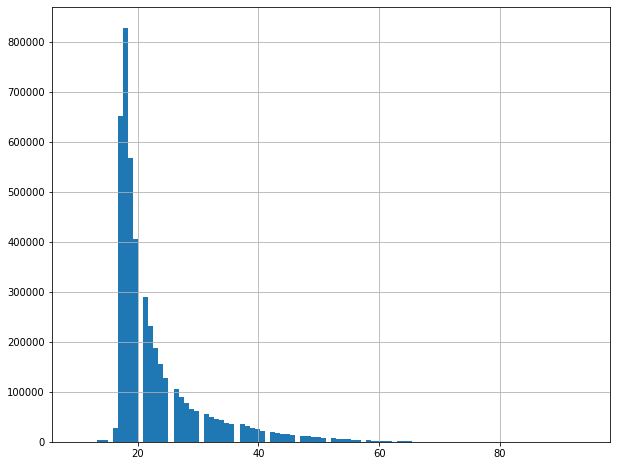

In [50]:
dt.query('IN_TREINEIRO == 0')['NU_IDADE'].dropna().hist(bins= 100, figsize=(10, 8))

<AxesSubplot:>

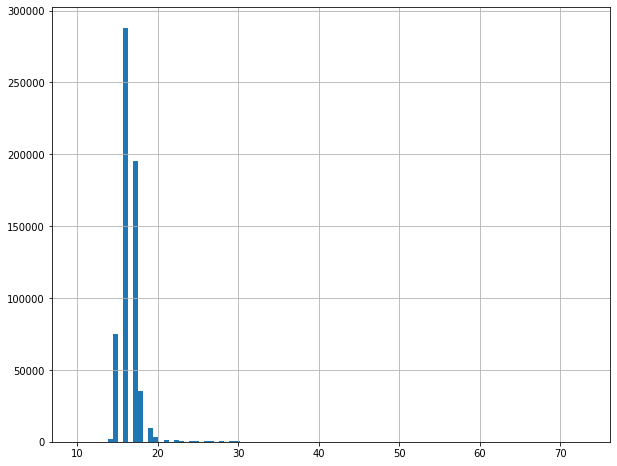

In [55]:
dt.query('IN_TREINEIRO == 1')['NU_IDADE'].dropna().hist(bins= 100, figsize=(10, 8))

In [54]:
notas= ['NU_NOTA_CN', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_REDACAO']
dt.loc[
    (dt['NU_NOTA_REDACAO'] != 0) & 
    (dt['IN_TREINEIRO'] == 0) & 
    (dt['TP_PRESENCA_MT'] == 1) & 
    (dt['TP_PRESENCA_LC'] == 1) & 
    (dt['TP_PRESENCA_CH'] == 1) & 
    (dt['TP_PRESENCA_CN'] == 1)
][notas].dropna().describe().apply(lambda s: s.apply('{0:.5f}'.format))

,NU_NOTA_CN,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_REDACAO
count,3089609.00000,3089609.00000,3089609.00000,3089609.00000,3089609.00000
mean,478.47193,522.71601,523.67191,511.48547,596.11567
std,76.22231,109.47035,61.82593,80.61888,156.37175
min,0.00000,0.00000,0.00000,0.00000,40.00000
25%,418.70000,434.60000,487.20000,452.90000,500.00000
50%,470.70000,500.00000,528.20000,514.70000,580.00000
75%,532.90000,596.70000,566.90000,569.40000,680.00000
max,860.90000,985.50000,801.70000,835.10000,1000.00000


In [44]:
dt['NU_NOTA_REDACAO'].mean()

571.1883479168748

In [45]:
dt['NU_NOTA_REDACAO'].std()

188.76327214930316

In [38]:
chunks[0].loc[(chunks[0]['TP_PRESENCA_MT'] == 1)&(chunks[0]['TP_PRESENCA_LC'] == 1)&(chunks[0]['TP_PRESENCA_CH'] == 1)&(chunks[0]['TP_PRESENCA_CN'] == 1)].dropna()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
3,17,TO,25.0,F,1,1,0,1,1,1,1,483.8,503.6,537.3,392.0,1.0,460.0
4,31,MG,22.0,F,1,1,0,1,1,1,1,513.6,575.5,570.7,677.0,1.0,860.0
5,51,MT,37.0,M,2,1,0,1,1,1,1,563.7,644.9,564.2,675.3,1.0,800.0
6,29,BA,22.0,F,3,1,0,1,1,1,1,484.6,488.4,507.2,594.7,1.0,600.0
9,35,SP,17.0,M,1,2,0,1,1,1,1,543.9,548.1,502.5,480.7,1.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499995,14,RR,18.0,M,2,1,0,1,1,1,1,484.7,581.6,557.0,753.6,1.0,500.0
1499996,43,RS,22.0,F,1,1,0,1,1,1,1,558.2,568.7,552.7,530.2,1.0,560.0
1499997,13,AM,38.0,F,3,1,0,1,1,1,1,496.9,578.9,534.4,470.7,1.0,480.0
1499998,41,PR,20.0,M,3,1,0,1,1,1,1,487.7,545.1,520.5,420.7,1.0,620.0


In [39]:
dt.loc[(dt['TP_PRESENCA_MT'] == 1) & (dt['TP_PRESENCA_LC'] == 1) & (dt['TP_PRESENCA_CH'] == 1) & (dt['TP_PRESENCA_CN'] == 1) & (dt['TP_STATUS_REDACAO'] == 1)].dropna()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
3,17,TO,25.0,F,1,1,0,1,1,1,1,483.8,503.6,537.3,392.0,1.0,460.0
4,31,MG,22.0,F,1,1,0,1,1,1,1,513.6,575.5,570.7,677.0,1.0,860.0
5,51,MT,37.0,M,2,1,0,1,1,1,1,563.7,644.9,564.2,675.3,1.0,800.0
6,29,BA,22.0,F,3,1,0,1,1,1,1,484.6,488.4,507.2,594.7,1.0,600.0
9,35,SP,17.0,M,1,2,0,1,1,1,1,543.9,548.1,502.5,480.7,1.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095257,51,MT,20.0,M,1,1,0,1,1,1,1,391.2,427.3,497.3,531.1,1.0,540.0
5095259,22,PI,37.0,F,4,1,0,1,1,1,1,414.6,485.9,406.6,423.4,1.0,480.0
5095260,35,SP,17.0,F,1,2,0,1,1,1,1,370.3,407.4,506.7,390.7,1.0,460.0
5095263,15,PA,33.0,F,3,1,0,1,1,1,1,499.6,507.8,537.0,498.3,1.0,540.0
